# Hotdog not Hotdog Classifier

Built by Arjun Sarao and Connor Wilson.
This Convolutional Neural Network uses `TensorFlow`

In [76]:
# Import the required libraries
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [68]:
# Load the data
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

dataset_training = train_datagen.flow_from_directory(
    "dataset/train/",
    class_mode="binary",
    color_mode="grayscale",
    batch_size=512,
    target_size=(64, 64),
    shuffle=True,
    seed=123,
    subset="training",
)

dataset_validation = test_datagen.flow_from_directory(
    "dataset/test/",
    class_mode="binary",
    color_mode="grayscale",
    batch_size=64,
    target_size=(64, 64),
)

Found 87377 images belonging to 2 classes.
Found 1187 images belonging to 2 classes.


In [69]:
# Displaying some example training images
# plt.figure(figsize=(10, 10))
# for images, labels in dataset_training.take(1):
#     for i in range(9):
#         ax = plt.subplot(3, 3, i + 1)
#         print(i)
#         plt.imshow(images[i].numpy().astype("uint8"))
#         plt.title("Hotdog" if str(labels[i].numpy()) == "0" else "Not Hotdog" )
#         plt.axis("off")

In [89]:
# Set up the model layers
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='elu', input_shape=(64, 64, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='elu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (5, 5), activation='elu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
# model.add(layers.Dense(32, activation='elu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [90]:
# What the individual layers look like
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 62, 62, 16)        160       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 29, 29, 16)        2320      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 10, 10, 16)        6416      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 400)              

In [91]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      # keras.metrics.AUC(name='auc'),
      # keras.metrics.AUC(name='prc', curve='PR'), 
      # keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
]

In [92]:

no_claim_count, claim_count = np.bincount(dataset_training.classes)
total_count = len(dataset_training.classes)

weight_no_claim = (1 / no_claim_count) * (total_count) / 2.0
weight_claim = (1 / claim_count) * (total_count) / 2.0

class_weights = {0: weight_no_claim, 1: weight_claim}

In [93]:
# Now we compile the model and train it
model.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy, metrics=METRICS)

history = model.fit(dataset_training, epochs=10, validation_data=dataset_validation, validation_steps=8, class_weight=class_weights)

Epoch 1/10
 88/171 [==============>...............] - ETA: 2:53 - loss: 0.6800 - tp: 20692.0000 - fp: 330.0000 - tn: 630.0000 - fn: 23229.0000 - accuracy: 0.4751 - precision: 0.9843 - recall: 0.4711 - categorical_accuracy: 1.0000

KeyboardInterrupt: 

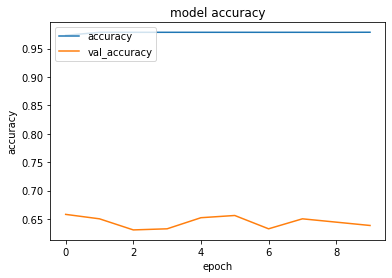

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
# plt.plot(history.history['val_loss'], label = 'val_loss')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')

plt.show()

In [ ]:
# Print the accuracy of the model as a percentage
print("Accuracy: ", model.evaluate(dataset_validation))

19/19 [==============================] - 2s 118ms/step - loss: 1.0580 - tp: 755.0000 - fp: 404.0000 - tn: 22.0000 - fn: 6.0000 - accuracy: 0.6546 - precision: 0.6514 - recall: 0.9921 - auc: 0.5805 - prc: 0.7200
Accuracy:  [1.0580278635025024, 755.0, 404.0, 22.0, 6.0, 0.6545913815498352, 0.6514236330986023, 0.9921156167984009, 0.5805339813232422, 0.7200446128845215]
